
# Projeto 2 - Previsão de AVC

# Nova seção

Este conjunto de dados é usado para prever se um paciente é susceptível de ter acidente vascular cerebral com base nos parâmetros de entrada, como sexo, idade, várias doenças e tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

Objetivo: Analisar os dados e fazer a previsão se o paciente sofrerá ou não derrame utilizando linguagem Python.

Fonte do dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
(Adaptado)

In [1]:
#Versão da Linguagem Python
from platform import python_version
print("Versão python utilizada neste projeto: ", python_version())

Versão python utilizada neste projeto:  3.9.13


In [2]:
#Instala o pacote watermark. 
!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# importar bibliotecas do modelo de Machine Learning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

matplotlib: 3.5.2
seaborn   : 0.11.2
pandas    : 1.4.4
numpy     : 1.21.5



Carregando o Dataset

In [6]:
#Carregando o  dataset
df = pd.read_csv('stroke_data.csv')

In [7]:
# Verificando o tipo do objeto
type(df)

pandas.core.frame.DataFrame

In [8]:
#Verificando quantas linhas e colunas tem o dataset
df.shape

(67135, 12)

In [9]:
#Total de registros considerando cada coluna
df.size

805620

In [10]:
#Verifica os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67135 entries, 0 to 67134
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0                  67135 non-null  int64  
 1   gender             67135 non-null  object 
 2   age                67135 non-null  float64
 3   hypertension       67135 non-null  int64  
 4   heart_disease      67135 non-null  int64  
 5   ever_married       67135 non-null  object 
 6   work_type          67135 non-null  object 
 7   Residence_type     67135 non-null  object 
 8   avg_glucose_level  67135 non-null  float64
 9   bmi                67135 non-null  float64
 10  smoking_status     67135 non-null  object 
 11  stroke             67135 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 6.1+ MB


1. id: identificador único
2. sexo: "Masculino", "Feminino" ou "Outro" 
3. idade: idade do paciente 
4. hipertensão: 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
5. heart_disease: 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca 
6. ever_married: "Não" ou "Sim"
7. work_type: "crianças", "Govt_jov", "Never_worked", "Privado" ou "Autônomo" 8. Residence_type: "Rural" ou "Urbano" 
9. avg_glucose_level: nível médio de glicose no sangue
10. IMC: índice
de massa corporal 
11. smoking_status: "anteriormente fumado", "nunca fumou", "fuma" ou "Desconhecido"* 
12. acidente vascular cerebral: 1 se o paciente teve um acidente vascular cerebral ou 0 se não *
Nota: "Desconhecido"
em smoking_status significa que a informação não
está disponível para este paciente

In [11]:
#Amostra das 5 primeiras linhas
df.head(5)

,0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,18.0,0,0,No,Private,Urban,94.19,12.12,smokes,1
1,2,Male,58.0,1,0,Yes,Private,Rural,154.24,33.70,never_smoked,0
2,3,Female,36.0,0,0,Yes,Govt_job,Urban,72.63,24.70,smokes,0
3,4,Female,62.0,0,0,Yes,Self-employed,Rural,85.52,31.20,formerly smoked,0
4,5,Female,82.0,0,0,Yes,Private,Rural,59.32,33.20,smokes,1


In [12]:
#Amostra das 5 últimas linhas
df.tail()

,0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
67130,67131,Male,18.0,0,0,No,Private,Urban,109.06,22.1,smokes,1
67131,67132,Female,29.0,0,0,Yes,Private,Urban,73.02,32.1,never_smoked,0
67132,67133,Female,24.0,0,0,No,Private,Urban,141.18,23.3,smokes,1
67133,67134,Female,77.0,0,0,Yes,Self-employed,Urban,199.71,36.2,formerly smoked,1
67134,67135,Male,76.0,0,1,Yes,Self-employed,Urban,202.96,31.8,formerly smoked,1


In [13]:
#Colunas dos conjunto de dados
df.columns

Index(['0', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
#Método value_counts() para cada tipo de dado
df.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

In [15]:
#Verificando o tipo de dado de cada coluna
df.dtypes

0                      int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [16]:
#Alterando algumas variáveis de inteiro para string
df['hypertension'] = df.hypertension.astype(str)
df['heart_disease'] = df.heart_disease.astype(str)
df['stroke'] = df.stroke.astype(str)
df['stroke'] = df.stroke.astype(str)

In [17]:
df.dtypes

0                      int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [18]:
#Verificando os tipos de trabalho e as quantidades de pacientes por tipo
tipos_trabalho = df['work_type'].value_counts()
print(tipos_trabalho)

Private          37806
Self-employed    14736
Govt_job          8260
children          6156
Never_worked       177
Name: work_type, dtype: int64


In [19]:
#Verificando os tipos de residência e as quantidades de pacientes por tipo
tipos_residencia = df['Residence_type'].value_counts()
print(tipos_residencia)

Urban    34023
Rural    33112
Name: Residence_type, dtype: int64


In [20]:
#Verificando os status de fumante e as quantidades de pacientes por tipo
tipos_fumante = df['smoking_status'].value_counts()
print(tipos_fumante)

smokes             35963
formerly smoked    17880
never_smoked       13292
Name: smoking_status, dtype: int64


In [21]:
#Verificando se há registros duplicados
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
67130    False
67131    False
67132    False
67133    False
67134    False
Length: 67135, dtype: bool

In [22]:
#Verificando se há valores ausentes
df.isnull().sum()

0                    0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Perguntas

1) Quantos pacientes sofreram e não sofreram derrame (stroke), respectivamente?

In [23]:
#Filtrando o dataset por "AVC" (1=Sim 2=Não) e calculando as quantidades
df1 = df['stroke'].value_counts()
print(df1)

1    40287
0    26848
Name: stroke, dtype: int64


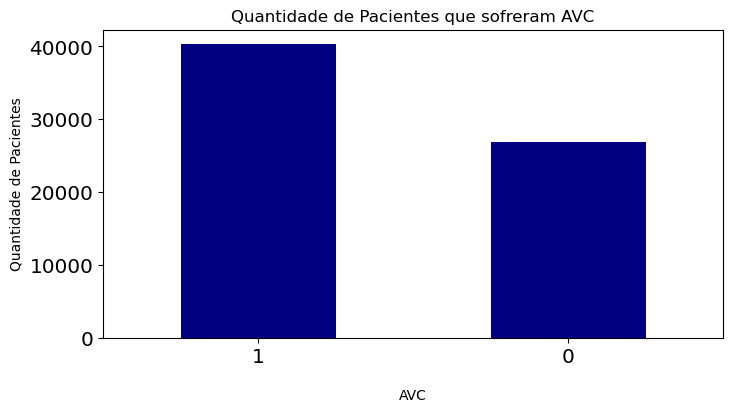

In [24]:
#Gráfico com matplotlib
df1.plot(kind = 'bar', 
                title = 'Quantidade de Pacientes que sofreram AVC',
                ylabel = 'Quantidade de Pacientes', 
                xlabel = '\nAVC',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 0)
plt.show()

2) Quantos pacientes tiveram derrame por tipo de trabalho (work_type)?

In [25]:
#Filtrando o dataset por pacientes que tiveram derrame
df_derrame = df[df['stroke'] == '1']

In [26]:
#Agrupando por tipo de trabalho, calculando as quantidades de pacientes por tipo e ordenando de forma decrescente
df_derrame_tipo_trabalho = df_derrame.groupby('work_type')['stroke'].value_counts().sort_values(ascending = False)

In [27]:
#Pacientes que sofreram derrame por tipo de trabalho
print(df_derrame_tipo_trabalho)

work_type      stroke
Private        1         23711
Self-employed  1         10807
Govt_job       1          5164
children       1           520
Never_worked   1            85
Name: stroke, dtype: int64


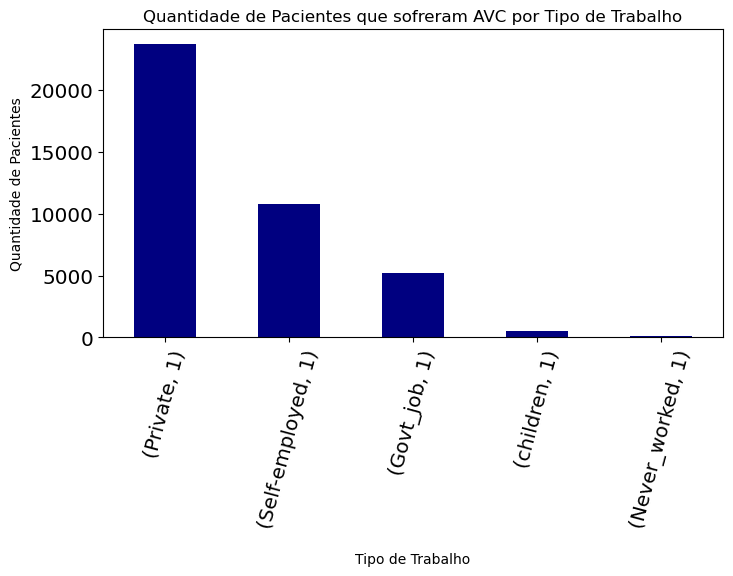

In [28]:
#Gráfico com matplotlib
df_derrame_tipo_trabalho.plot(kind = 'bar', 
                title = 'Quantidade de Pacientes que sofreram AVC por Tipo de Trabalho',
                ylabel = 'Quantidade de Pacientes', 
                xlabel = '\nTipo de Trabalho',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

3) Quantos pacientes sofreram derrame e trabalhavam respectivamente, no setor privado,
de forma independente, no governo e quantas são crianças?

In [29]:
#Agrupando os pacientes que sofreram derrame por tipo de trabalho, verificando suas quantidades e ordenando de forma decrescente
df_derrame_tipo_trabalho = df_derrame.groupby('work_type')['stroke'].value_counts().sort_values(ascending=False)
print(df_derrame_tipo_trabalho)

work_type      stroke
Private        1         23711
Self-employed  1         10807
Govt_job       1          5164
children       1           520
Never_worked   1            85
Name: stroke, dtype: int64


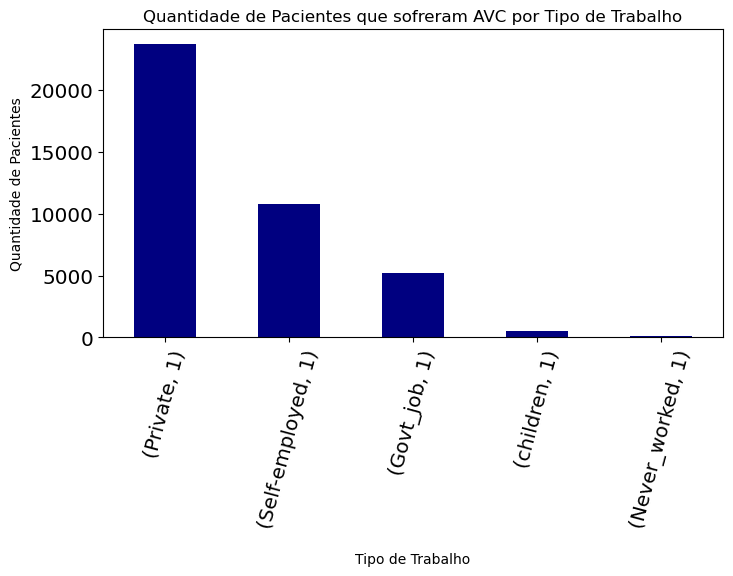

In [30]:
df_derrame_tipo_trabalho.plot(kind = 'bar', 
                title = 'Quantidade de Pacientes que sofreram AVC por Tipo de Trabalho',
                ylabel = 'Quantidade de Pacientes', 
                xlabel = '\nTipo de Trabalho',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

4) Qual a proporção, por gênero, de participantes do estudo? A maioria dos participantes é de qual gênero?

In [31]:
#Filtrando por gênero e calculando a quantidade por gênero
df_genero = df['gender'].value_counts()
print(df_genero)

Female    39530
Male      27594
Other        11
Name: gender, dtype: int64


In [32]:
#Calculando o total de participantes no estudo
df_total = df_genero.sum()
print(df_total)

67135


In [33]:
#Calculando a porcentagem de cada gênero
df_prop = (df_genero / df_total) *100

In [34]:
#Porcentagem de participantes por gênero
print(df_prop)

Female    58.881358
Male      41.102257
Other      0.016385
Name: gender, dtype: float64


In [35]:
#Destacando o gênero com maior participação
df_prop_maioria = df_prop.idxmax()
print('A maioria dos participantes do estudo é do gênero:', df_prop_maioria)

A maioria dos participantes do estudo é do gênero: Female


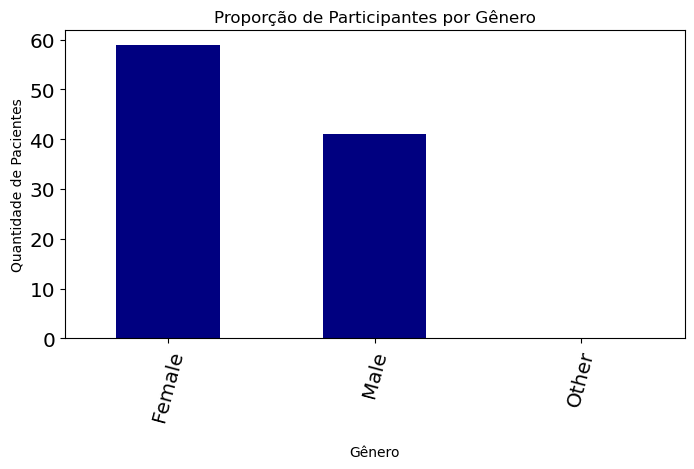

In [36]:
#Gráfico com matplotlib
df_prop.plot(kind = 'bar', 
                title = 'Proporção de Participantes por Gênero',
                ylabel = 'Quantidade de Pacientes', 
                xlabel = '\nGênero',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

5) Quem tem mais probabilidade de sofrer derrame: hipertensos ou não-hipertensos? Qual sua conclusão?

In [37]:
#Verificando casos de derrame entre hipertensos e não-hipertensos
df_hipertensao_derrame = df.groupby('hypertension')['stroke'].value_counts()
print(df_hipertensao_derrame)

hypertension  stroke
0             1         31470
              0         24648
1             1          8817
              0          2200
Name: stroke, dtype: int64


In [38]:
#Filtrando por hipertensão e calculando a quantidade de pacientes
df_hipertensao = df['hypertension'].value_counts()
print(df_hipertensao)

0    56118
1    11017
Name: hypertension, dtype: int64


In [39]:
#Filtrando os hipertensos e que sofreram derrame
df_hipertenso_com_derrame = df[(df.hypertension == '1') & (df.stroke == '1')]


In [40]:
#Agrupando por hipertenso e calculando quantos sofreram derrame
df5 = df_hipertenso_com_derrame.groupby('hypertension')['stroke'].value_counts()
print(df5)

hypertension  stroke
1             1         8817
Name: stroke, dtype: int64


In [41]:
#Calculando a porcentagem de ser hipertenso e sofrer derrame
df_prop_hipertensao = (8817 / 11017) *100
print(df_prop_hipertensao)

80.03086139602432


In [42]:
#Calculando a porcentagem de não ser hipertenso e sofrer derrame
df_prop_nao_hipertensao = (31470 / 56118) *100
print(df_prop_nao_hipertensao)

56.07826365871913


In [43]:
#Destacando quem tem maior probabilidade de sofer derrame
print('Os hipertensos têm maior probabilidade de sofrer derrame conforme este conjunto de dados')

Os hipertensos têm maior probabilidade de sofrer derrame conforme este conjunto de dados


6) Qual o número de pessoas que sofreram derrame por idade? 
Com qual idade o maior número de pessoas do conjunto de dados sofreu derrame?

In [44]:
#Agrupando os pacientes que sofreram derrame por idade, verificando suas quantidades e ordenando de forma decrescente
df_derrame_idade = df_derrame.groupby('age')['stroke'].value_counts().sort_values(ascending = False)
print(df_derrame_idade)

age    stroke
79.00  1         2916
78.00  1         2279
80.00  1         1858
81.00  1         1738
82.00  1         1427
                 ... 
13.00  1          131
12.00  1          119
11.00  1           95
10.00  1           62
1.32   1            1
Name: stroke, Length: 74, dtype: int64


In [45]:
#Destacando a idade em que houve maior número de pessoas que sofreram derrame
df_derrame_idade_maior = df_derrame_idade.idxmax()
print('A idade em que houve o maior número de pessoas que sofreu derrame:', df_derrame_idade_maior)

A idade em que houve o maior número de pessoas que sofreu derrame: (79.0, '1')


7) Quantas pessoas sofreram derrame após os 50 anos?

In [46]:
#Filtrando pela idade maior que 50 anos
df_derrame_mais50 = df_derrame[df_derrame['age'] >50]

In [47]:
#Agrupando por idade e calculando as quantidades de pacientes por idade dentre os que sofreram derrame
df7 = df_derrame_mais50.groupby('age')['stroke'].value_counts()
print(df7)

age   stroke
51.0  1          643
52.0  1          580
53.0  1          409
54.0  1          544
55.0  1          387
56.0  1          569
57.0  1          775
58.0  1          645
59.0  1          647
60.0  1          579
61.0  1          646
62.0  1          550
63.0  1          942
64.0  1          376
65.0  1          716
66.0  1          848
67.0  1          801
68.0  1          688
69.0  1          677
70.0  1          881
71.0  1          667
72.0  1          709
73.0  1          759
74.0  1          987
75.0  1          809
76.0  1          892
77.0  1          994
78.0  1         2279
79.0  1         2916
80.0  1         1858
81.0  1         1738
82.0  1         1427
Name: stroke, dtype: int64


In [48]:
#Calculando o total de pessoas que sofreram derrame após os 50 anos
df_derrame_pos50 = df7.sum()
print(df_derrame_pos50)

28938


8) Qual o nível médio de glicose para pessoas que, respectivamente, sofreram e não sofreram derrame.

In [49]:
#Agrupando por derrame e calculando a média de nível médio de glicose para quem sofreu e não sofreu derrame
df_glicose = df.groupby('stroke')['avg_glucose_level'].mean()
print(df_glicose)

stroke
0    103.602731
1    119.953070
Name: avg_glucose_level, dtype: float64


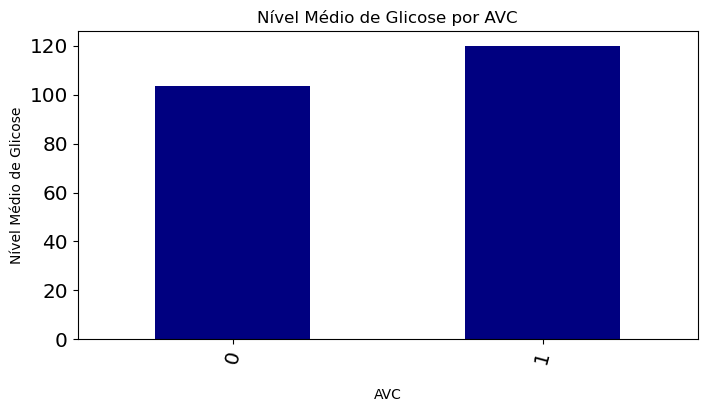

In [50]:
#Gráfico com matplotlib
df_glicose.plot(kind = 'bar', 
                title = 'Nível Médio de Glicose por AVC',
                ylabel = 'Nível Médio de Glicose', 
                xlabel = '\nAVC',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

9) Qual é o BMI (IMC = índice de massa corpórea) médio de quem sofreu e não sofreu derrame?

In [51]:
#Agrupando por derrame e calculando a média de Índice de Massa Corpórea para quem sofreu e não sofreu derrame
df_bmi = df.groupby('stroke')['bmi'].mean()
print(df_bmi)

stroke
0    27.989679
1    29.942491
Name: bmi, dtype: float64


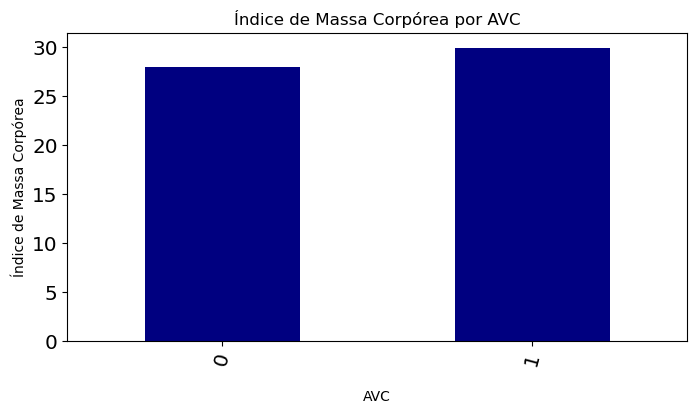

In [52]:
#Gráfico com matplotlib
df_bmi.plot(kind = 'bar', 
                title = 'Índice de Massa Corpórea por AVC',
                ylabel = 'Índice de Massa Corpórea', 
                xlabel = '\nAVC',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

Construção de um modelo de árvore de decisão para prever a chance de 
derrame (stroke) a partir de algumas variáveis contínuas/categóricas:
idade, BMI, hipertensão, doença do coração, nível médio de
glicose.

In [53]:
#Visualizando o dataser
df.head()

,0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,18.0,0,0,No,Private,Urban,94.19,12.12,smokes,1
1,2,Male,58.0,1,0,Yes,Private,Rural,154.24,33.70,never_smoked,0
2,3,Female,36.0,0,0,Yes,Govt_job,Urban,72.63,24.70,smokes,0
3,4,Female,62.0,0,0,Yes,Self-employed,Rural,85.52,31.20,formerly smoked,0
4,5,Female,82.0,0,0,Yes,Private,Rural,59.32,33.20,smokes,1


In [54]:
#Verificando os tipos das variáveis
df.dtypes

0                      int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [55]:
#Convertendo algumas variáveis de object para numéricas
df['hypertension'] = df.hypertension.astype(int)
df['heart_disease'] = df.heart_disease.astype(int)
df['stroke'] = df.stroke.astype(int)

In [56]:
#Verificando os tipos das variáveis
df.dtypes

0                      int64
gender                object
age                  float64
hypertension           int32
heart_disease          int32
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int32
dtype: object

In [57]:
#Verficando informações estatísticas das variáveis numéricas
df.describe()

,0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,67135.000000,67135.000000,67135.000000,67135.000000,67135.000000,67135.000000,67135.000000
mean,33568.000000,51.959508,0.164102,0.101423,113.414396,29.161540,0.600089
std,19380.349498,23.413054,0.370371,0.301890,51.258817,7.102057,0.489883
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,16784.500000,35.000000,0.000000,0.000000,78.370000,24.400000,0.000000
50%,33568.000000,56.000000,0.000000,0.000000,94.160000,28.800000,1.000000
75%,50351.500000,73.000000,0.000000,0.000000,126.460000,32.600000,1.000000
max,67135.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [58]:
#Verficando informações das variáveis categóricas
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,67135,67135,67135,67135,67135
unique,3,2,5,2,3
top,Female,Yes,Private,Urban,smokes
freq,39530,49323,37806,34023,35963


In [59]:
#Removendo linhas com valores ausentes
df = df.dropna()  

In [60]:
df.isnull().sum()

0                    0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [61]:
# Filtrando apenas as colunas numéricas
colunas_numericas= df.select_dtypes(include=['int64', 'float64', 'int32']).columns
dados_numericos = df[colunas_numericas]

In [62]:
#Separando as variáveis dependentes da variável alvo
X = dados_numericos.drop('stroke', axis=1)
y = dados_numericos['stroke']

In [63]:
#Dividindo os dados entre treinamento o teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [64]:
#Criando o modelo de árvore de decisão
model = DecisionTreeClassifier()

In [65]:
#Treinando o modelo
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
#Fazendo previsões no conjunto de teste
predicted = model.predict(X_test)

In [67]:
#Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, predicted)
print(f"Acurácia: {accuracy}")

Acurácia: 0.7147538541744247


Adicionando ao modelo as variáveis categóricas gênero e status de fumante

In [68]:
#Convertendo a variável'gender' em 0 (Male), 1 (Female) e 2 (Other)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

In [69]:
#Convertendo a variável'smoking_status'
df['smoking_status'] = df['smoking_status'].map({'smokes': 0, 'formerly smoked': 1, 'never_smoked': 2})

In [70]:
#Verificando os tipos das variáveis
df.dtypes

0                      int64
gender                 int64
age                  float64
hypertension           int32
heart_disease          int32
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int32
dtype: object

In [71]:
#Verificando os resultado
df.head()

,0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1,18.0,0,0,No,Private,Urban,94.19,12.12,0,1
1,2,0,58.0,1,0,Yes,Private,Rural,154.24,33.70,2,0
2,3,1,36.0,0,0,Yes,Govt_job,Urban,72.63,24.70,0,0
3,4,1,62.0,0,0,Yes,Self-employed,Rural,85.52,31.20,1,0
4,5,1,82.0,0,0,Yes,Private,Rural,59.32,33.20,0,1


In [72]:
# Filtrando pelas colunas numéricas
colunas_numericas2= df.select_dtypes(include=['int64', 'float64', 'int32']).columns
dados_numericos2 = df[colunas_numericas2]

In [73]:
#Separando as variáveis dependentes da variável alvo
X = dados_numericos2.drop('stroke', axis=1)
y = dados_numericos2['stroke']

In [74]:
#Dividindo os dados entre treinamento o teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [75]:
#Criando o modelo de árvore de decisão
model = DecisionTreeClassifier()

In [76]:
#Treinando o modelo
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
#Fazendo previsões no conjunto de teste
predicted = model.predict(X_test)

In [78]:
#Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, predicted)
print(f"Acurácia: {accuracy}")

Acurácia: 0.8616221047143815


10) Qual dessas variáveis é mais importante no modelo de árvore
de decisão que você construiu na questão anterior?

In [79]:
#Obtendo a importância das variáveis
importance = model.feature_importances_

In [80]:
#Verificando o resultado
for i, imp in enumerate(importance):
    print(f"Variável {X.columns[i]}: {imp}")

Variável 0: 0.08558781424689797
Variável gender: 0.01127911083473492
Variável age: 0.1582501469590547
Variável hypertension: 0.010205979795865659
Variável heart_disease: 0.010396899802354207
Variável avg_glucose_level: 0.17933189104674038
Variável bmi: 0.15045667975704333
Variável smoking_status: 0.3944914775573087


A variável mais importante neste modelo é a 'smoking_status'.

11) Qual a profundidade da árvore de decisão do 2° modelo?

In [81]:
#Calculando a profundidade da árvore
depth = model.tree_.max_depth

In [82]:
#Visualizando o resultado
print(f"Profundidade da árvore: {depth}")

Profundidade da árvore: 56


12) Quantos nodos a árvore de decisão possui?

In [83]:
#Calculando o número de nós na árvore
num_nodes = model.tree_.node_count

In [84]:
#Visualizando o número de nós
print(f"Número de nós na árvore: {num_nodes}")

Número de nós na árvore: 11323
